<a href="https://colab.research.google.com/github/wajeehatayyab/Deep-learning/blob/main/FlowerRecogniation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Flowers Recognition**
# **Dataset Description: **

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

# **Attribute Information: **
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.

# **WORKFLOW :**
Load Data
Split into 60 and 40 ratio.
Encode labels.
Create Model
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)
Train the Model.
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 85%
Evaluation Step
Prediction




# **Data :**
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [84]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop


In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
cd /content/drive/MyDrive/'Deeplearning_Assignment '/

/content/drive/MyDrive/Deeplearning_Assignment 


In [87]:
ls

 CarPrice_Assignment.csv                 CreditCardFraudDetection.ipynb
 Car_Price_Prediction_assignmenl.ipynb   FlowerRecogniation.ipynb
 compresive_strength_concrete.csv        flowers/
 ConcreteStrenghtAssignment.ipynb       'Ionosphere Assignment.ipynb'
 creditcard.csv                          ionosphere_data.csv


In [88]:
val_batch = 10
train_batch = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.30,
        )
train_generator = train_datagen.flow_from_directory(
        './flowers',
        target_size=(180, 180),
        batch_size=train_batch,
        class_mode='sparse',
        subset = 'training',
        color_mode = 'rgb',
        shuffle = True)
validation_generator = train_datagen.flow_from_directory(
        './flowers',
        target_size=(180, 180),
        batch_size=val_batch,
        class_mode='sparse',
        subset = 'validation',
        color_mode = 'rgb',
        shuffle= True)

Found 144 images belonging to 5 classes.
Found 61 images belonging to 5 classes.


In [89]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [90]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [91]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
model = Sequential()
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(8, activation='elu'))
model.add(layers.Dropout(0.2))
model.add(Dense(5,  activation='softmax'))

In [93]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [94]:
# %tensorflow_version 2.x
import tensorflow as tf

In [95]:
with tf.device('/device:GPU:0'):
    result = model.fit(
          train_generator,
          steps_per_epoch = 20,
          batch_size = train_batch,
          validation_data = validation_generator,
          validation_batch_size= val_batch,
          epochs=20)

Epoch 1/20
20/20 [==============================] - 2s 45ms/step - loss: 2.6635 - accuracy: 0.6255 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [96]:
model.evaluate(validation_generator)

7/7 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [97]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

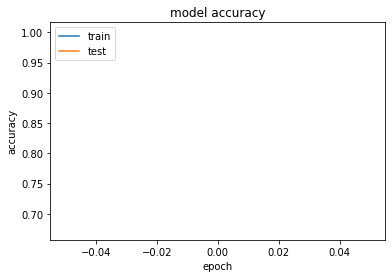

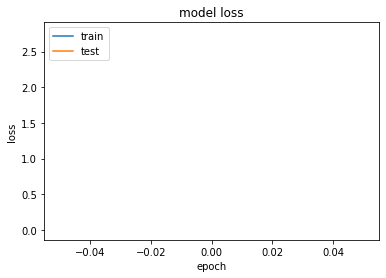

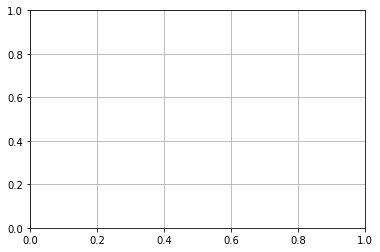

In [98]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.grid()

In [99]:
y_pred1 = model.predict(validation_generator)

In [100]:
y_pred1

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.0000

In [101]:
list1 = []
for i in range(0,len(validation_generator)):
    for j in range(0,val_batch):
        try:
              list1.append(validation_generator[i][1][j].tolist())
        except:
              break

In [102]:
tf.math.confusion_matrix(
    list1, np.argmax(y_pred1, axis=1), num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[61]], dtype=int32)>